Importing Relavant Libraries

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt



Loading Data onto Data Frame and Examining the Dataset


In [296]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking for null values

In [297]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Checking for types of Values

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Removing Irrelavant Columns

In [299]:
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

Checking for Types of Data

In [300]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [301]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [302]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
categorical_columns = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
categorical_object_columns = ['Geography', 'Gender']

One-Hot Encoding String Type Categorical Data

In [303]:
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(df[categorical_object_columns])
encoded_columns_dense = encoded_columns.toarray()
encoded_columns_names = encoder.get_feature_names_out(categorical_object_columns)
encoded_df = pd.DataFrame(encoded_columns_dense, columns=encoded_columns_names)
df = pd.concat([df, encoded_df], axis=1)
df.drop(categorical_object_columns, axis=1, inplace=True)
categorical_columns.append(encoded_columns_names)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [304]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking for Outliers

<Axes: >

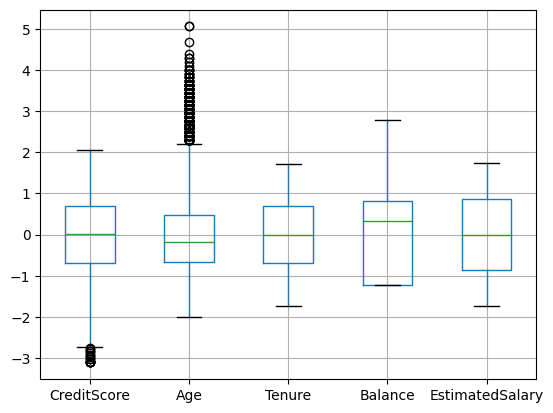

In [305]:
z_scores_df = (df[numerical_columns] - df[numerical_columns].mean())/ df[numerical_columns].std()
z_scores_df.boxplot()

Removing Outliers

In [306]:
df['Age_zscore'] = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())
outlier_indices = df[df['Age_zscore'] > 2.5].index
df = df.drop(outlier_indices)
df.drop(columns=['Age_zscore'], inplace=True)

df['Credit_zscore'] = np.abs((df['CreditScore'] - df['CreditScore'].mean()) / df['CreditScore'].std())
outlier_indices = df[df['Credit_zscore'] > 2.5].index
df = df.drop(outlier_indices)
df.drop(columns=['Credit_zscore'], inplace=True)

Data Smoothing using Rolling Mean

In [307]:
for column in numerical_columns:
    df[column] = df[column].rolling(window=3, min_periods=1).mean()

In [308]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000,9711.000000
mean,650.846755,38.032867,5.012271,76592.762686,1.530738,0.705077,0.505715,100037.914836,0.203790,0.501802,0.250850,0.247348,0.454227,0.545773
std,55.039355,5.249344,1.658211,36335.833508,0.581253,0.456032,0.499993,33002.087174,0.402835,0.500022,0.433524,0.431493,0.497926,0.497926
min,462.666667,21.666667,0.333333,0.000000,1.000000,0.000000,0.000000,2632.246667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,613.166667,34.333333,3.666667,47076.443333,1.000000,0.000000,0.000000,77171.396667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,651.333333,37.666667,5.000000,78178.236667,1.000000,1.000000,1.000000,100066.160000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,688.666667,41.333333,6.333333,101870.360000,2.000000,1.000000,1.000000,122922.733333,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,842.666667,59.000000,10.000000,183361.633333,4.000000,1.000000,1.000000,193682.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
print(numerical_columns)
print(categorical_columns)

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'], dtype=object)]


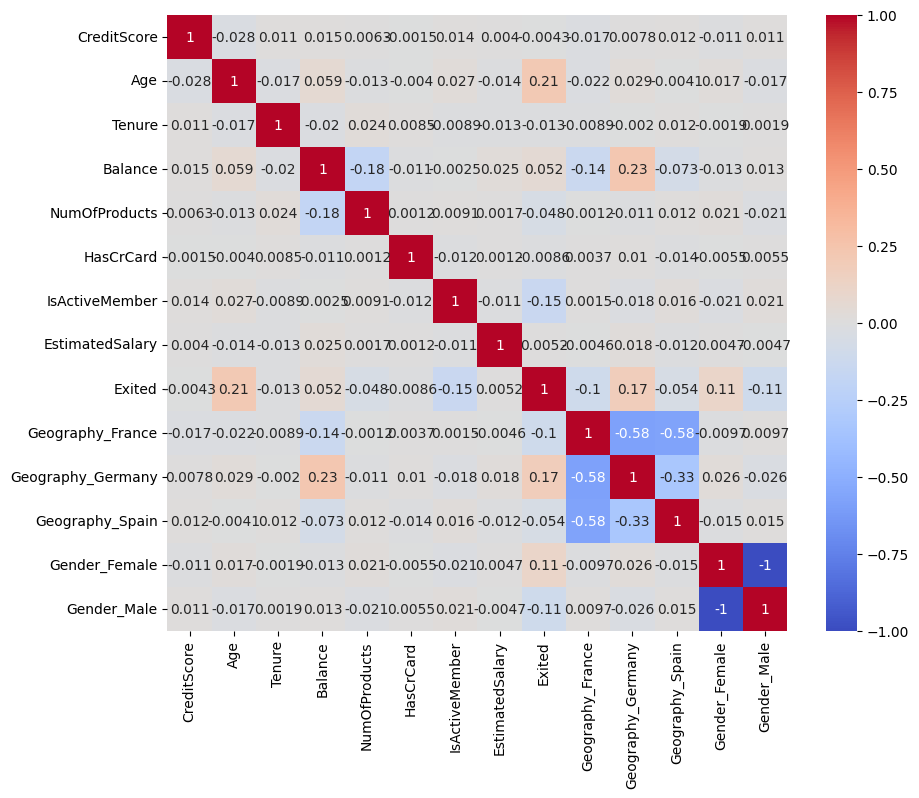

In [310]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
